In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) 


df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


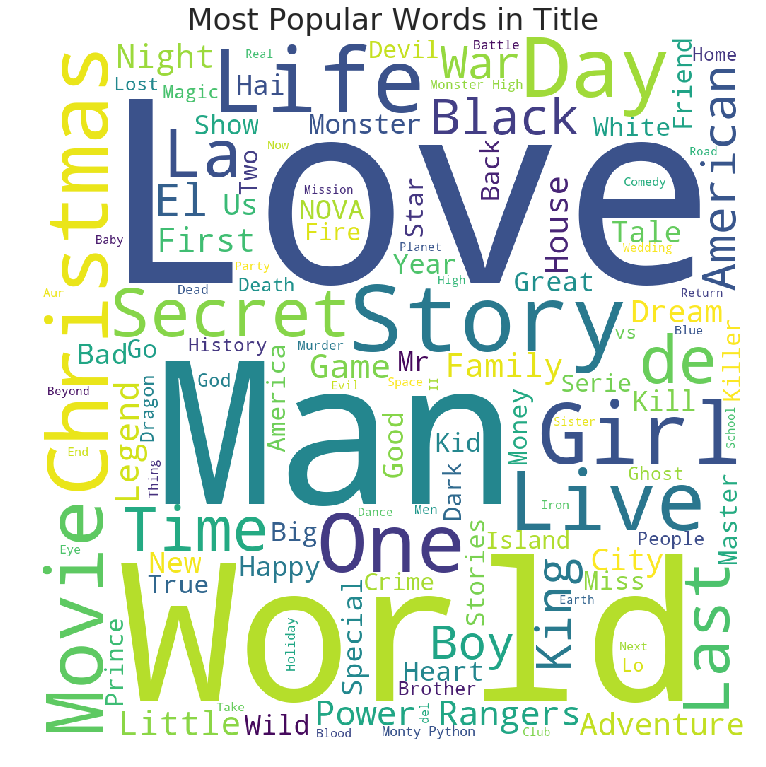

In [4]:
#Generate a Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(" ".join(df['title']))
  
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

Movie      4265
TV Show    1969
Name: type, dtype: int64


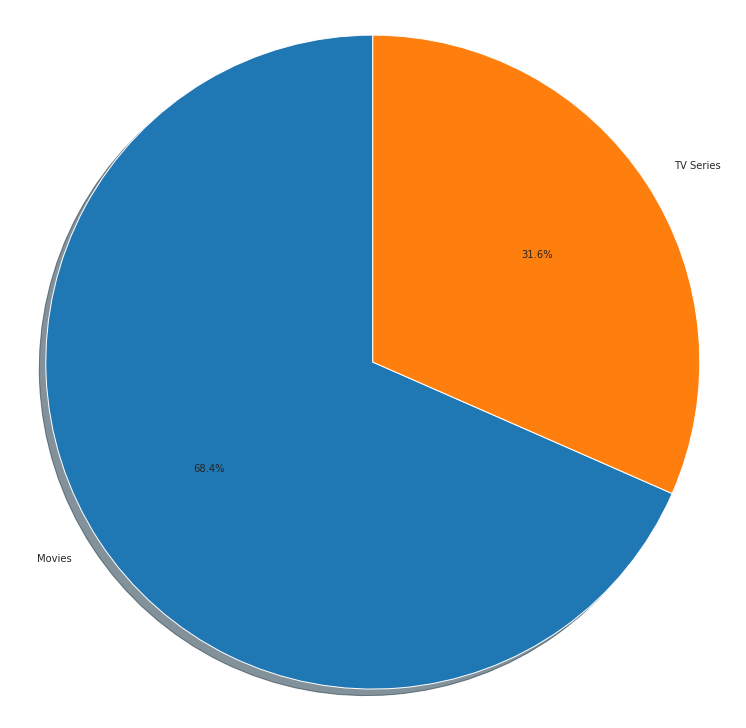

In [5]:

labels = 'Movies','TV Series'
sr = pd.Series(df['type'])
x = sr.value_counts()
print(x)
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [6]:
new_df = df[['title','director','cast','listed_in','description']]
new_df.head()


6234

In [7]:
!pip install rake-nltk

from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=06d78e5e970db534ee06841ddb74ae3d56cee45f6017bcf7f60ed8df51b54aba
  Stored in directory: /root/.cache/pip/wheels/ad/4f/6b/a5e7778f5c084d8b7c2c5fe9d37eb806f5ff5fee5e8ee17342
Successfully built rake-nltk


In [8]:
#Clean Data
new_df.dropna(inplace = True)

blanks = []  # start with an empty list

col=['title','director','cast','listed_in','description']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new_df.drop(blanks, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
# initializing the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,director,cast,listed_in,Key_words
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies","[planning, evil, archaeologist, first, awesome..."
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,"[longtime, crush, ex, interest, lands, social,..."
6,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","International Movies, Sci-Fi & Fantasy, Thrillers","[robot, killed, insurance, adjuster, dystopian..."
7,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Stand-Up Comedy,"[reflecting, family, whatsapp, groups, set, fa..."
9,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","Action & Adventure, Thrillers","[recently, murdered, stash, believe, strugglin..."


In [10]:
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()
    
new_df.set_index('title', inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [11]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
new_df.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby alanmarriott andrewtoth ..."
#realityhigh,fernandolebrija nestacooper katewalsh johnmich...
Automata,gabeibáñez antoniobanderas dylanmcdermott mela...
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz fabriziocopano st..."
Good People,henrikrubengenz jamesfranco katehudson tomwilk...


In [13]:
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

indices = pd.Series(new_df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                               #realityhigh
2                                   Automata
3         Fabrizio Copano: Solo pienso en mi
4                                Good People
Name: title, dtype: object

In [14]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.04454354, 0.04166667, ..., 0.        , 0.        ,
        0.03450328],
       [0.04454354, 1.        , 0.        , ..., 0.        , 0.03253   ,
        0.03688556],
       [0.04166667, 0.        , 1.        , ..., 0.03311331, 0.03042903,
        0.03450328],
       ...,
       [0.        , 0.        , 0.03311331, ..., 1.        , 0.31437304,
        0.38388595],
       [0.        , 0.03253   , 0.03042903, ..., 0.31437304, 1.        ,
        0.32756921],
       [0.03450328, 0.03688556, 0.03450328, ..., 0.38388595, 0.32756921,
        1.        ]])

In [15]:
def recommendations(Title, cosine_sim = cosine_sim) :
    
    recommended_movies = []    
    idx = indices[indices == Title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    top_10_indexes = list(score_series.iloc[1:11].index)
    
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [16]:
recommendations('Planetarium')

["The Butterfly's Dream",
 "The Devil's Mistress",
 'Westerplatte Resists',
 'Riphagen - The Untouchable',
 'The Innocents',
 'Mudbound',
 'Rangoon',
 'Suite Française',
 'Sangam',
 'All of You']